In [6]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [7]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in photometric prior mode

In [8]:
magnitude_columns = [
                    ('mag_g_orig', 'auto'),
                    ('mag_r_orig', 'auto'),
                    ('mag_z_orig', 'auto'),
                    ('mag_w1_orig', 'auto'),
                    ('mag_w2_orig', 'auto'),
                    ('mag_w3_orig', 'auto'),
                    ('mag_w4_orig', 'auto'),
                    ('col_gr_orig', 'auto'),
                    ('col_rz_orig', 'auto'),
                    ('col_gz_orig', 'auto'),
                    ('col_zw1_orig', 'auto'),
                    ('col_rw2_orig', 'auto'),
                    ('col_w1w2_orig', 'auto'),
                    ('col_zw3_orig', 'auto'),
                    ('col_rw4_orig', 'auto'),
                    ('col_w3w4_orig', 'auto'),
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.843224,1.969860e-12,NaN
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,4.574190,1.817511e-12,NaN
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,0.816664,1.505411e-12,NaN
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,0.797151,1.001123e-12,NaN
...,...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,4.828206,1.637604e-15,NaN
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,3.936292,1.608667e-15,NaN
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,3.697835,1.595806e-15,NaN
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,4.029289,1.532857e-15,NaN


    adding angular separation columns
matching: 152204 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:02<00:00, 3306.13it/s]
Incorporating bias "DESI:mag_g_orig" ...
magnitude histogram of column "DESI_mag_g_orig": 10241 secure matches, 10458 insecure matches and 2359406 secure non-matches of 2418574 total entries (2369647 valid)
magnitude histogram stored to "DESI_mag_g_orig_fit.txt".


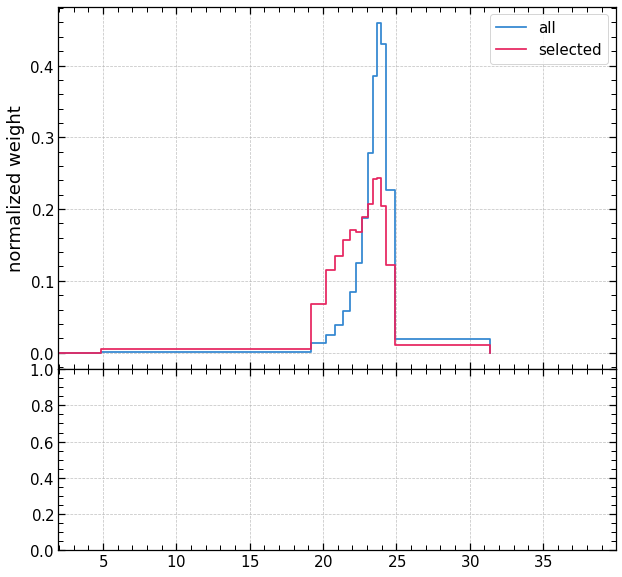

Incorporating bias "DESI:mag_r_orig" ...
magnitude histogram of column "DESI_mag_r_orig": 10364 secure matches, 10458 insecure matches and 2395426 secure non-matches of 2418574 total entries (2405790 valid)
magnitude histogram stored to "DESI_mag_r_orig_fit.txt".


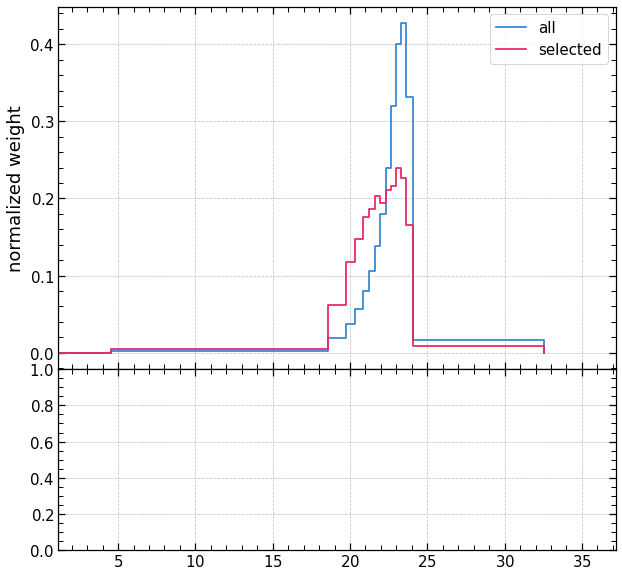

Incorporating bias "DESI:mag_z_orig" ...
magnitude histogram of column "DESI_mag_z_orig": 10366 secure matches, 10458 insecure matches and 2392079 secure non-matches of 2418574 total entries (2402445 valid)
magnitude histogram stored to "DESI_mag_z_orig_fit.txt".


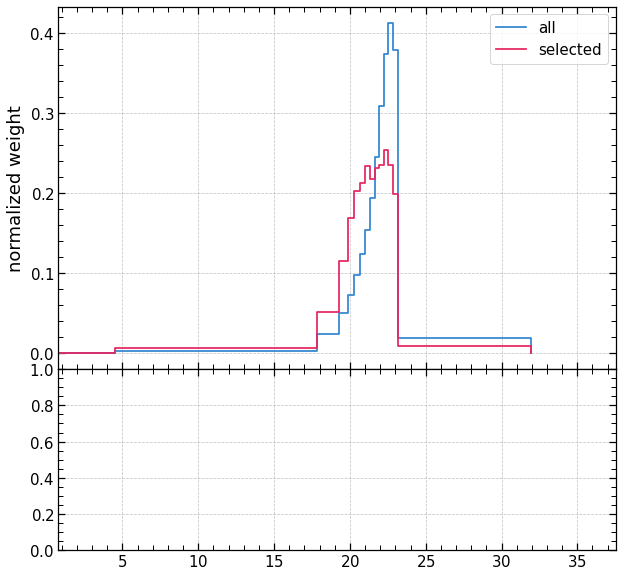

Incorporating bias "DESI:mag_w1_orig" ...
magnitude histogram of column "DESI_mag_w1_orig": 9726 secure matches, 10458 insecure matches and 2112482 secure non-matches of 2418574 total entries (2122208 valid)
magnitude histogram stored to "DESI_mag_w1_orig_fit.txt".


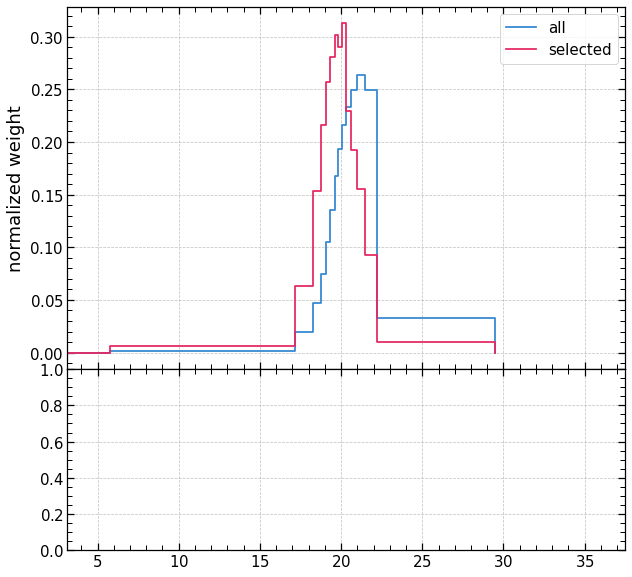

Incorporating bias "DESI:mag_w2_orig" ...
magnitude histogram of column "DESI_mag_w2_orig": 9290 secure matches, 10458 insecure matches and 1826159 secure non-matches of 2418574 total entries (1835449 valid)
magnitude histogram stored to "DESI_mag_w2_orig_fit.txt".


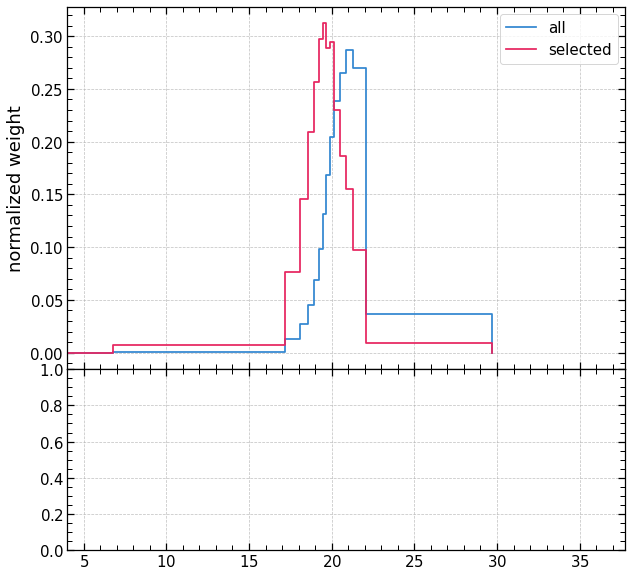

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:mag_w3_orig" ...
magnitude histogram of column "DESI_mag_w3_orig": 7191 secure matches, 10458 insecure matches and 1213417 secure non-matches of 2418574 total entries (1220608 valid)
magnitude histogram stored to "DESI_mag_w3_orig_fit.txt".


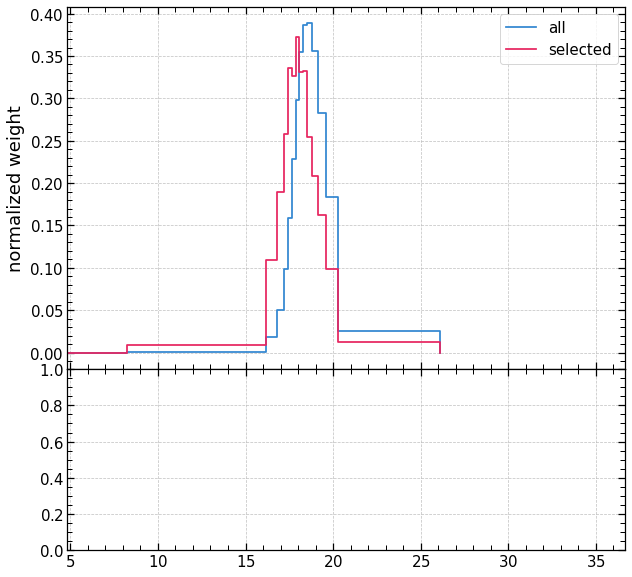

Incorporating bias "DESI:mag_w4_orig" ...
magnitude histogram of column "DESI_mag_w4_orig": 6067 secure matches, 10458 insecure matches and 1177898 secure non-matches of 2418574 total entries (1183965 valid)
magnitude histogram stored to "DESI_mag_w4_orig_fit.txt".


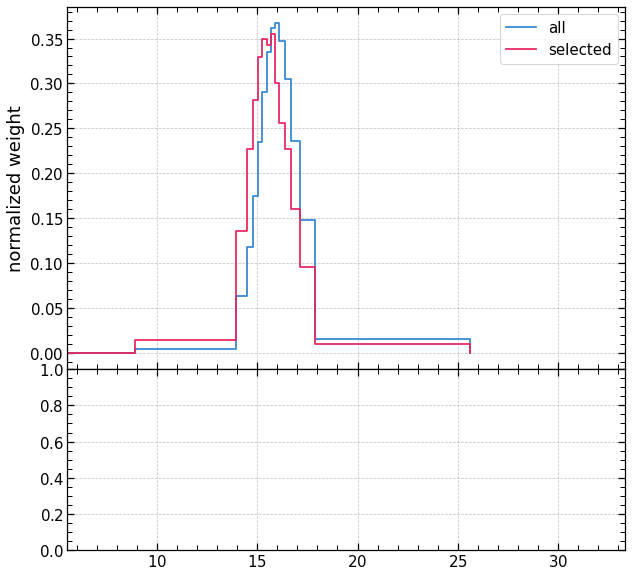

Incorporating bias "DESI:col_gr_orig" ...
magnitude histogram of column "DESI_col_gr_orig": 10207 secure matches, 10458 insecure matches and 2351900 secure non-matches of 2418574 total entries (2362107 valid)
magnitude histogram stored to "DESI_col_gr_orig_fit.txt".


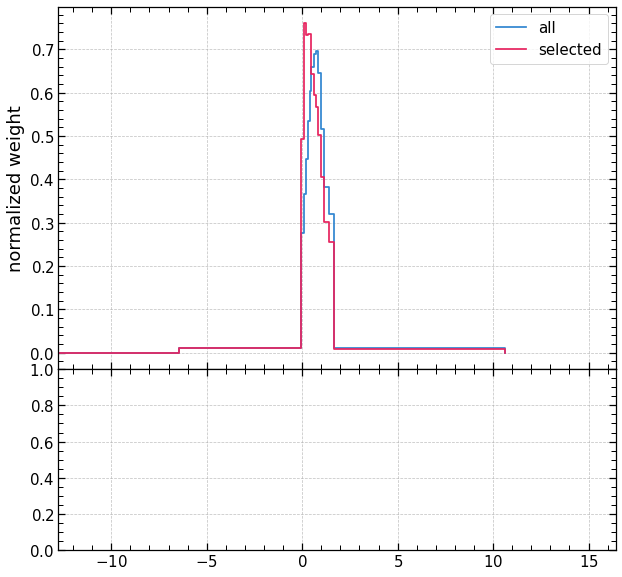

Incorporating bias "DESI:col_rz_orig" ...
magnitude histogram of column "DESI_col_rz_orig": 10312 secure matches, 10458 insecure matches and 2380368 secure non-matches of 2418574 total entries (2390680 valid)
magnitude histogram stored to "DESI_col_rz_orig_fit.txt".


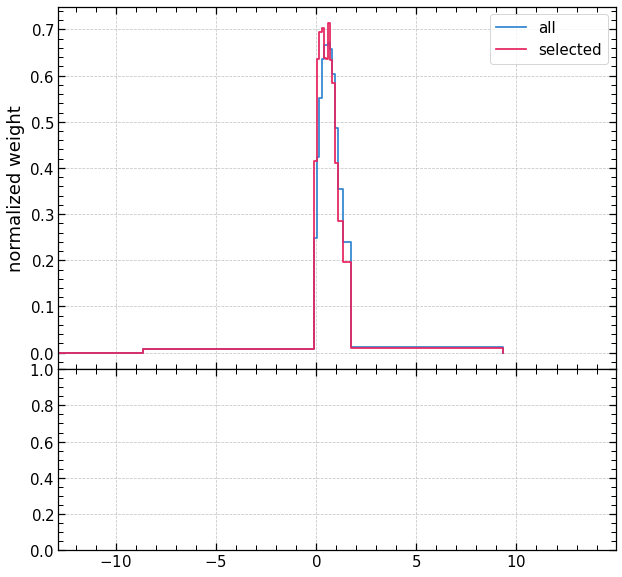

Incorporating bias "DESI:col_gz_orig" ...
magnitude histogram of column "DESI_col_gz_orig": 10187 secure matches, 10458 insecure matches and 2344551 secure non-matches of 2418574 total entries (2354738 valid)
magnitude histogram stored to "DESI_col_gz_orig_fit.txt".


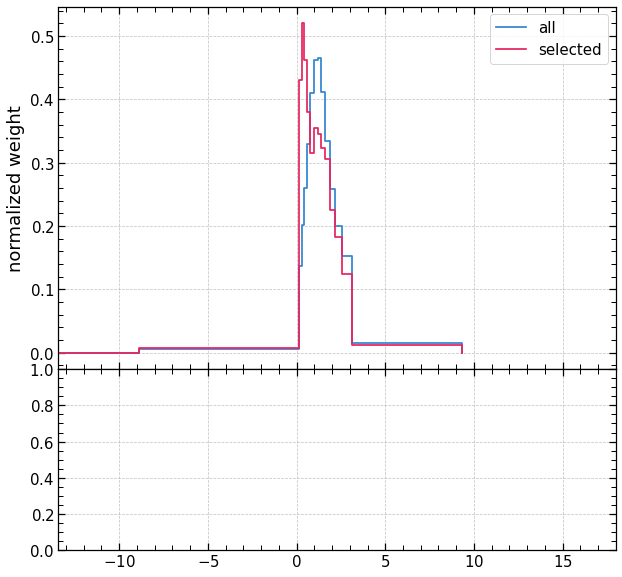

Incorporating bias "DESI:col_zw1_orig" ...
magnitude histogram of column "DESI_col_zw1_orig": 9702 secure matches, 10458 insecure matches and 2105593 secure non-matches of 2418574 total entries (2115295 valid)
magnitude histogram stored to "DESI_col_zw1_orig_fit.txt".


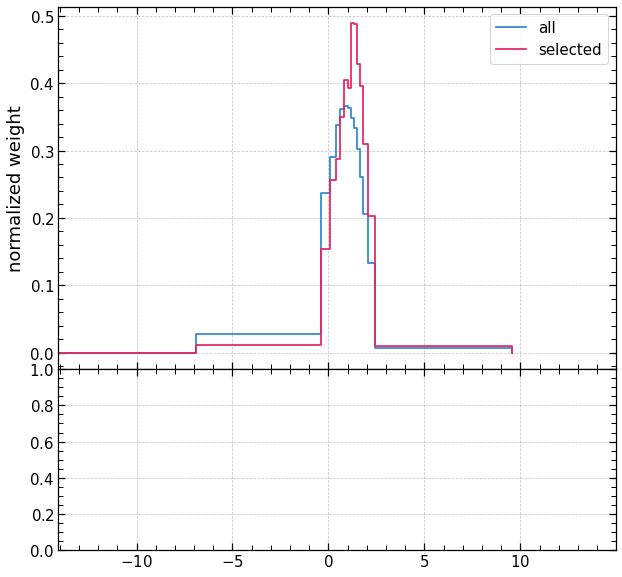

Incorporating bias "DESI:col_rw2_orig" ...
magnitude histogram of column "DESI_col_rw2_orig": 9249 secure matches, 10458 insecure matches and 1817451 secure non-matches of 2418574 total entries (1826700 valid)
magnitude histogram stored to "DESI_col_rw2_orig_fit.txt".


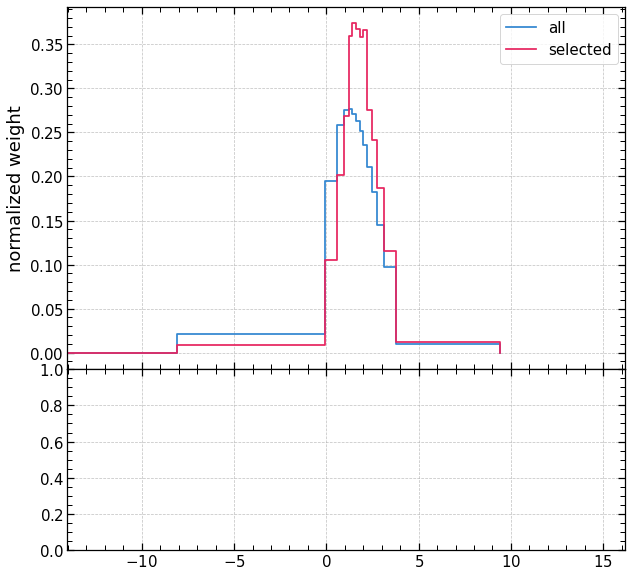

Incorporating bias "DESI:col_w1w2_orig" ...
magnitude histogram of column "DESI_col_w1w2_orig": 9101 secure matches, 10458 insecure matches and 1722559 secure non-matches of 2418574 total entries (1731660 valid)
magnitude histogram stored to "DESI_col_w1w2_orig_fit.txt".


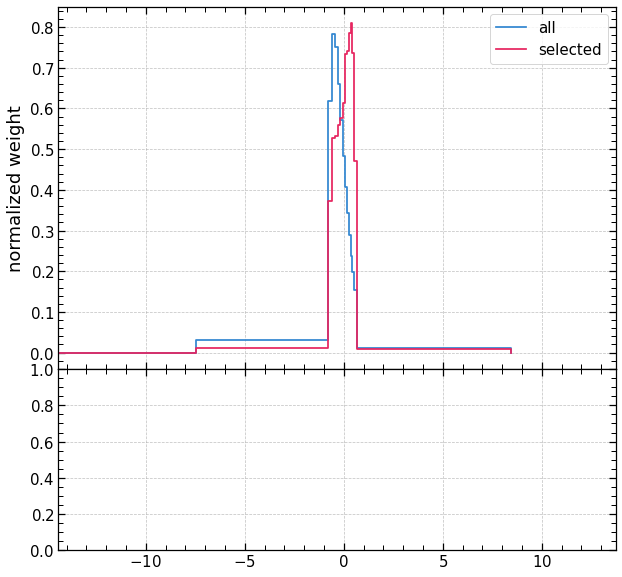

Incorporating bias "DESI:col_zw3_orig" ...
magnitude histogram of column "DESI_col_zw3_orig": 7165 secure matches, 10458 insecure matches and 1206740 secure non-matches of 2418574 total entries (1213905 valid)
magnitude histogram stored to "DESI_col_zw3_orig_fit.txt".


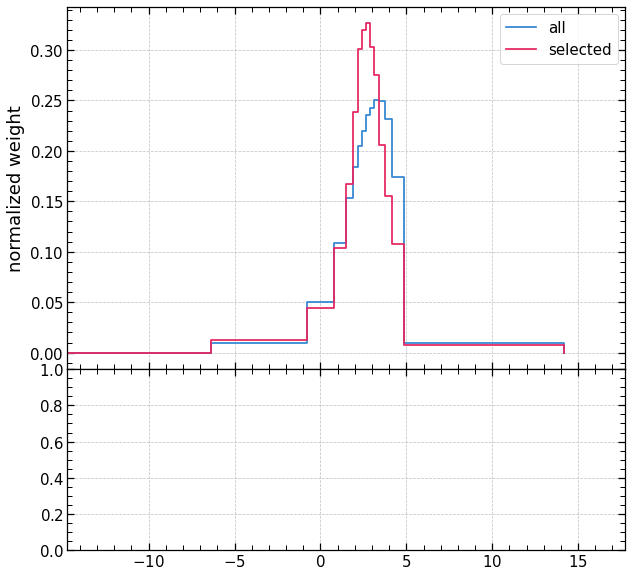

Incorporating bias "DESI:col_rw4_orig" ...
magnitude histogram of column "DESI_col_rw4_orig": 6037 secure matches, 10458 insecure matches and 1172070 secure non-matches of 2418574 total entries (1178107 valid)
magnitude histogram stored to "DESI_col_rw4_orig_fit.txt".


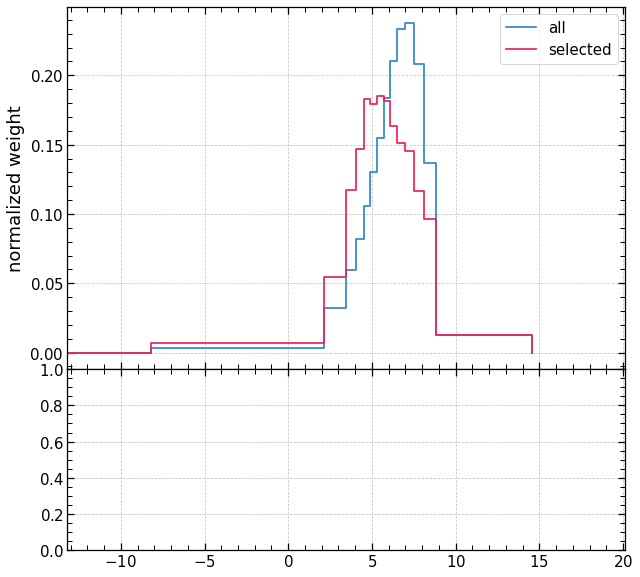

Incorporating bias "DESI:col_w3w4_orig" ...
magnitude histogram of column "DESI_col_w3w4_orig": 4468 secure matches, 10458 insecure matches and 608287 secure non-matches of 2418574 total entries (612755 valid)
magnitude histogram stored to "DESI_col_w3w4_orig_fit.txt".


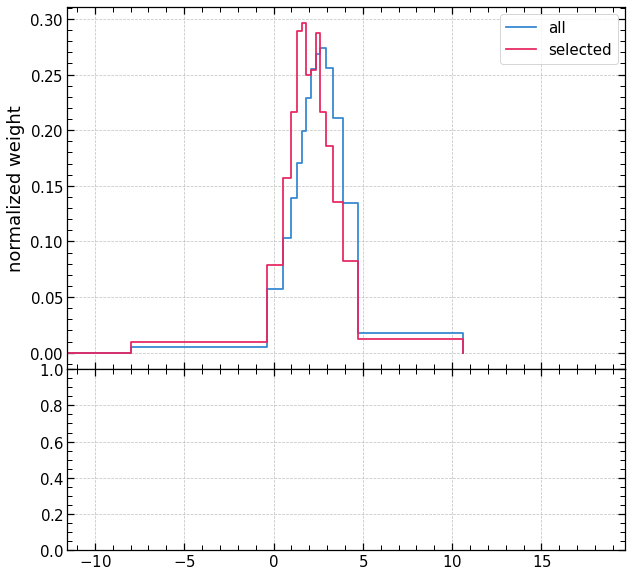


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [9]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


    adding angular separation columns
matching: 112369 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 3309.40it/s]
Incorporating bias "DESI:mag_g_orig" ...
magnitude histogram of column "DESI_mag_g_orig": 2918 secure matches, 2988 insecure matches and 2366729 secure non-matches of 2418574 total entries (2369647 valid)
magnitude histogram stored to "DESI_mag_g_orig_fit.txt".


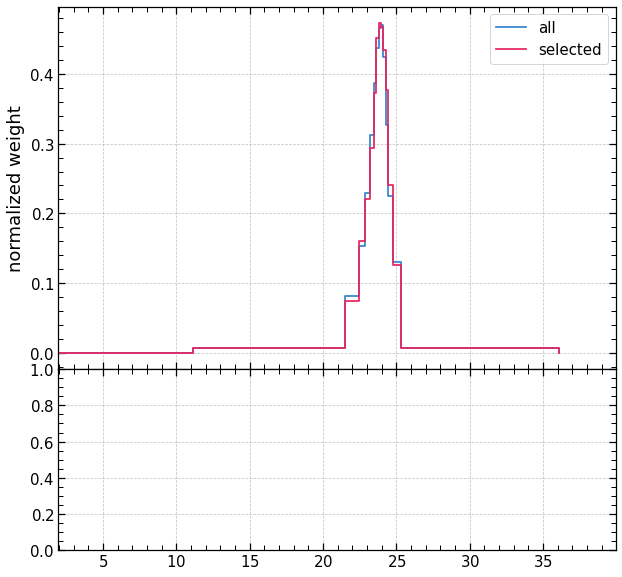

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:mag_r_orig" ...
magnitude histogram of column "DESI_mag_r_orig": 2974 secure matches, 2988 insecure matches and 2402816 secure non-matches of 2418574 total entries (2405790 valid)
magnitude histogram stored to "DESI_mag_r_orig_fit.txt".


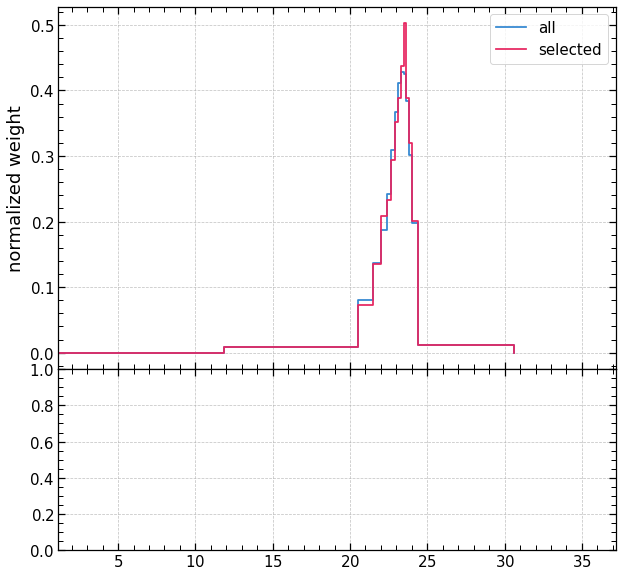

Incorporating bias "DESI:mag_z_orig" ...
magnitude histogram of column "DESI_mag_z_orig": 2967 secure matches, 2988 insecure matches and 2399478 secure non-matches of 2418574 total entries (2402445 valid)
magnitude histogram stored to "DESI_mag_z_orig_fit.txt".


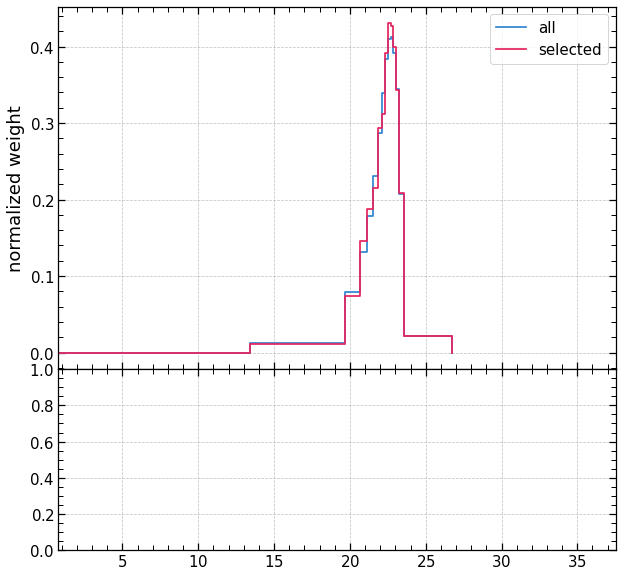

Incorporating bias "DESI:mag_w1_orig" ...
magnitude histogram of column "DESI_mag_w1_orig": 2637 secure matches, 2988 insecure matches and 2119571 secure non-matches of 2418574 total entries (2122208 valid)
magnitude histogram stored to "DESI_mag_w1_orig_fit.txt".


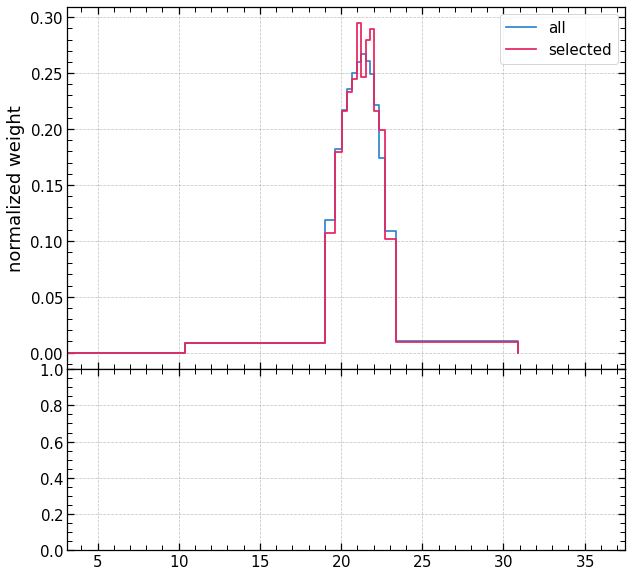

Incorporating bias "DESI:mag_w2_orig" ...
magnitude histogram of column "DESI_mag_w2_orig": 2300 secure matches, 2988 insecure matches and 1833149 secure non-matches of 2418574 total entries (1835449 valid)
magnitude histogram stored to "DESI_mag_w2_orig_fit.txt".


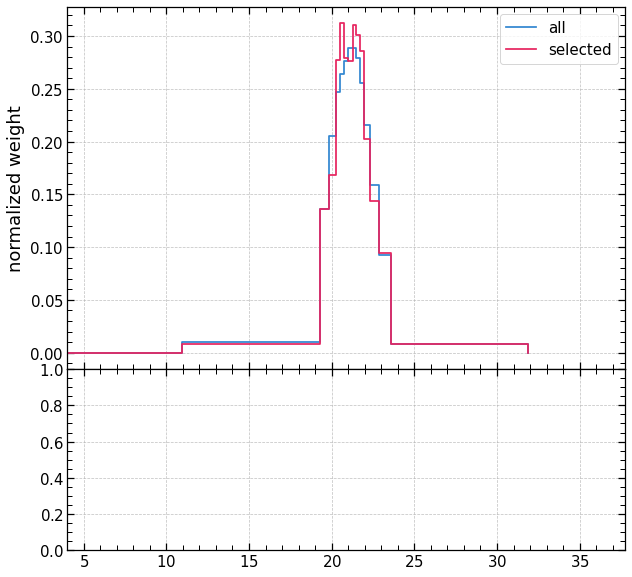

Incorporating bias "DESI:mag_w3_orig" ...
magnitude histogram of column "DESI_mag_w3_orig": 1510 secure matches, 2988 insecure matches and 1219098 secure non-matches of 2418574 total entries (1220608 valid)
magnitude histogram stored to "DESI_mag_w3_orig_fit.txt".


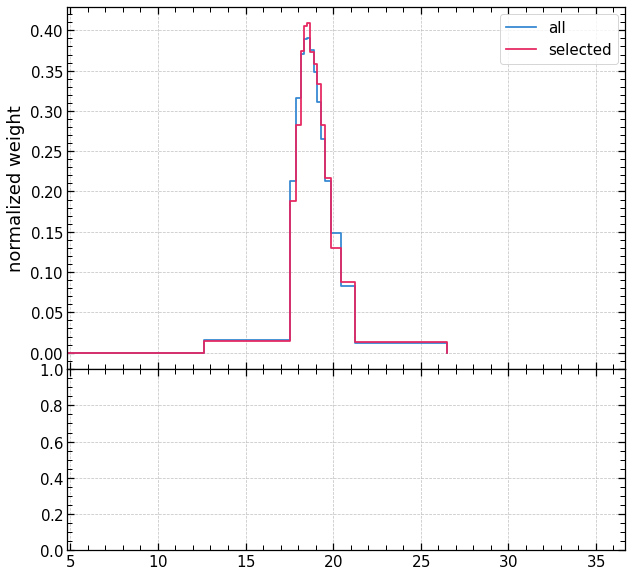

Incorporating bias "DESI:mag_w4_orig" ...
magnitude histogram of column "DESI_mag_w4_orig": 1445 secure matches, 2988 insecure matches and 1182520 secure non-matches of 2418574 total entries (1183965 valid)
magnitude histogram stored to "DESI_mag_w4_orig_fit.txt".


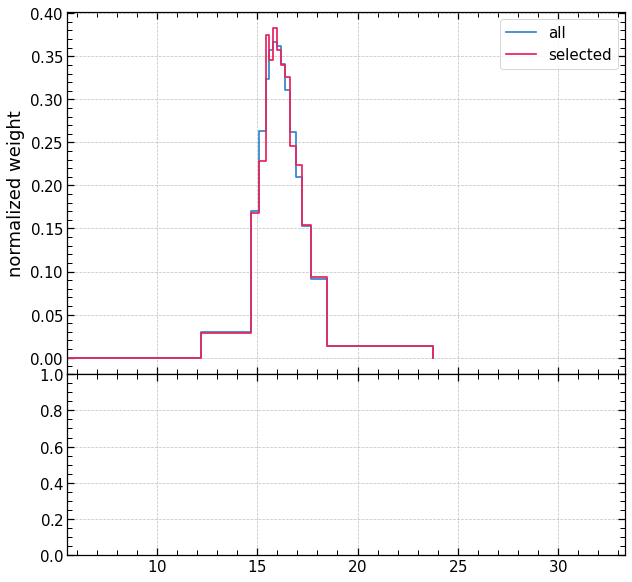

Incorporating bias "DESI:col_gr_orig" ...
magnitude histogram of column "DESI_col_gr_orig": 2910 secure matches, 2988 insecure matches and 2359197 secure non-matches of 2418574 total entries (2362107 valid)
magnitude histogram stored to "DESI_col_gr_orig_fit.txt".


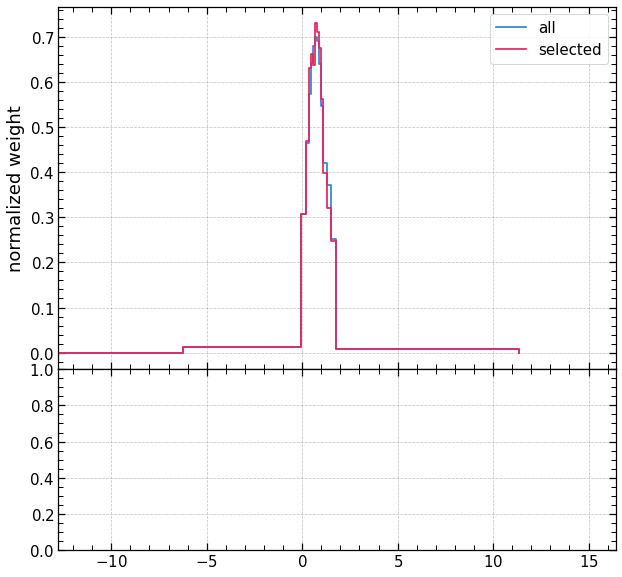

Incorporating bias "DESI:col_rz_orig" ...
magnitude histogram of column "DESI_col_rz_orig": 2953 secure matches, 2988 insecure matches and 2387727 secure non-matches of 2418574 total entries (2390680 valid)
magnitude histogram stored to "DESI_col_rz_orig_fit.txt".


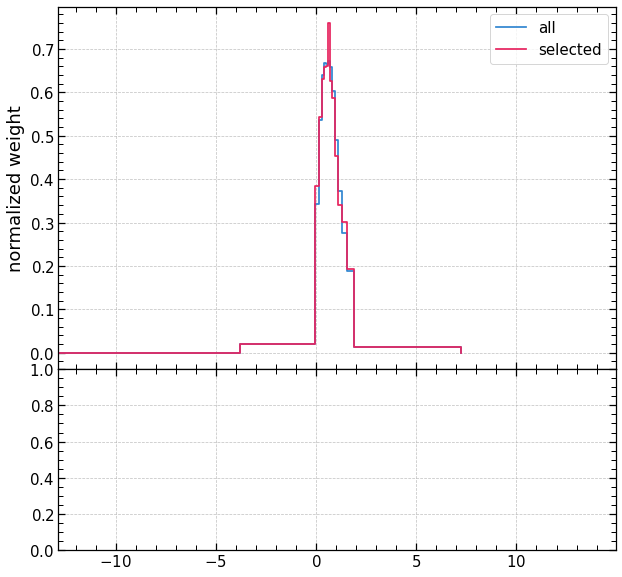

Incorporating bias "DESI:col_gz_orig" ...
magnitude histogram of column "DESI_col_gz_orig": 2899 secure matches, 2988 insecure matches and 2351839 secure non-matches of 2418574 total entries (2354738 valid)
magnitude histogram stored to "DESI_col_gz_orig_fit.txt".


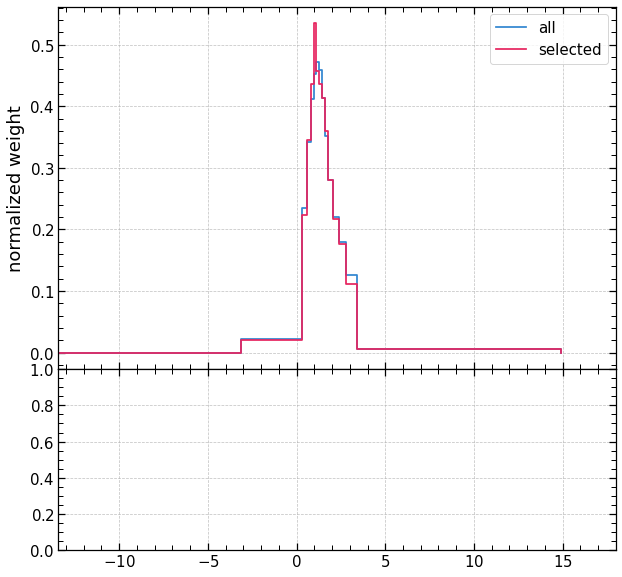

Incorporating bias "DESI:col_zw1_orig" ...
magnitude histogram of column "DESI_col_zw1_orig": 2628 secure matches, 2988 insecure matches and 2112667 secure non-matches of 2418574 total entries (2115295 valid)
magnitude histogram stored to "DESI_col_zw1_orig_fit.txt".


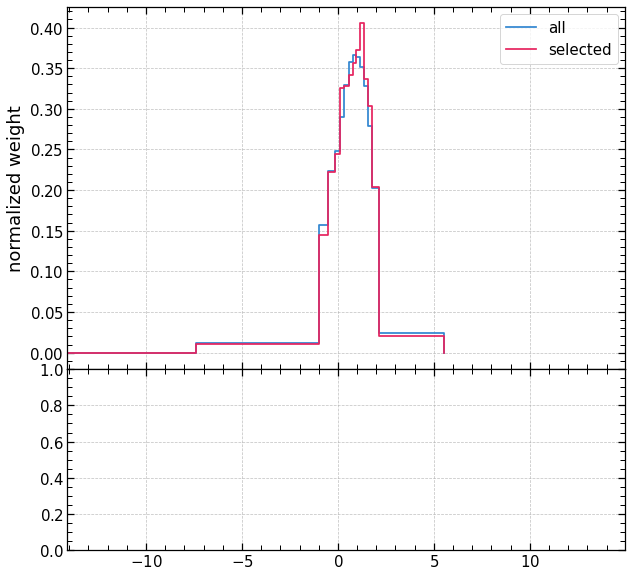

Incorporating bias "DESI:col_rw2_orig" ...
magnitude histogram of column "DESI_col_rw2_orig": 2292 secure matches, 2988 insecure matches and 1824408 secure non-matches of 2418574 total entries (1826700 valid)
magnitude histogram stored to "DESI_col_rw2_orig_fit.txt".


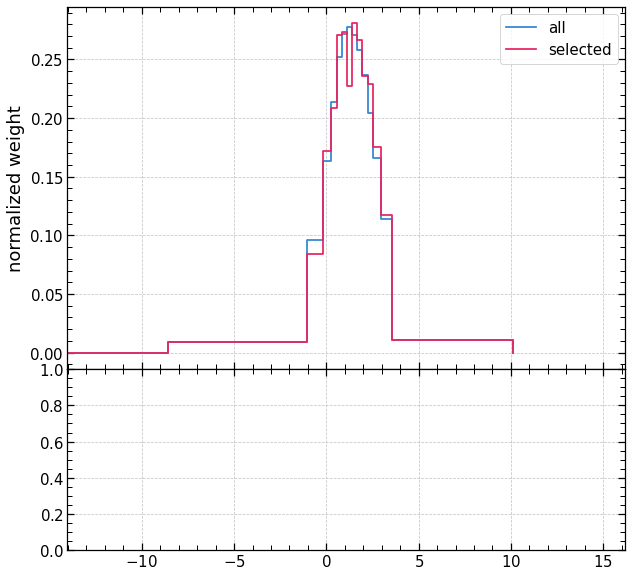

Incorporating bias "DESI:col_w1w2_orig" ...
magnitude histogram of column "DESI_col_w1w2_orig": 2169 secure matches, 2988 insecure matches and 1729491 secure non-matches of 2418574 total entries (1731660 valid)
magnitude histogram stored to "DESI_col_w1w2_orig_fit.txt".


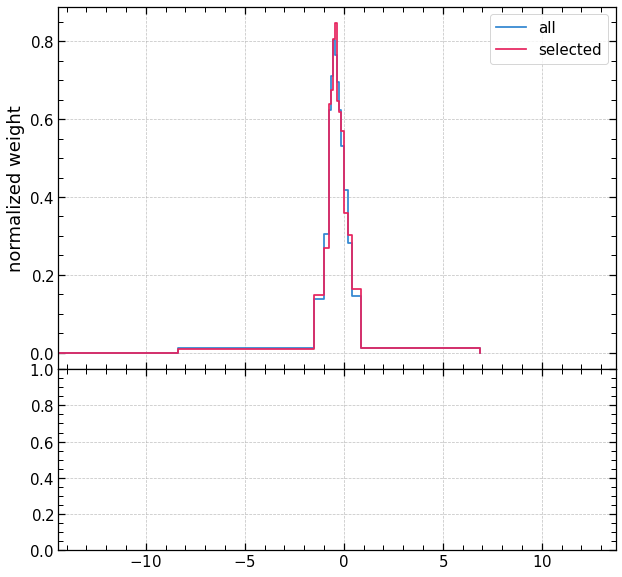

Incorporating bias "DESI:col_zw3_orig" ...
magnitude histogram of column "DESI_col_zw3_orig": 1503 secure matches, 2988 insecure matches and 1212402 secure non-matches of 2418574 total entries (1213905 valid)
magnitude histogram stored to "DESI_col_zw3_orig_fit.txt".


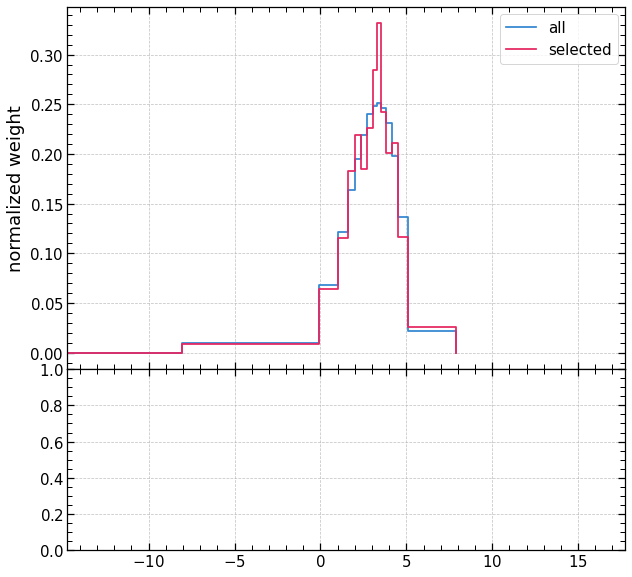

Incorporating bias "DESI:col_rw4_orig" ...
magnitude histogram of column "DESI_col_rw4_orig": 1437 secure matches, 2988 insecure matches and 1176670 secure non-matches of 2418574 total entries (1178107 valid)
magnitude histogram stored to "DESI_col_rw4_orig_fit.txt".


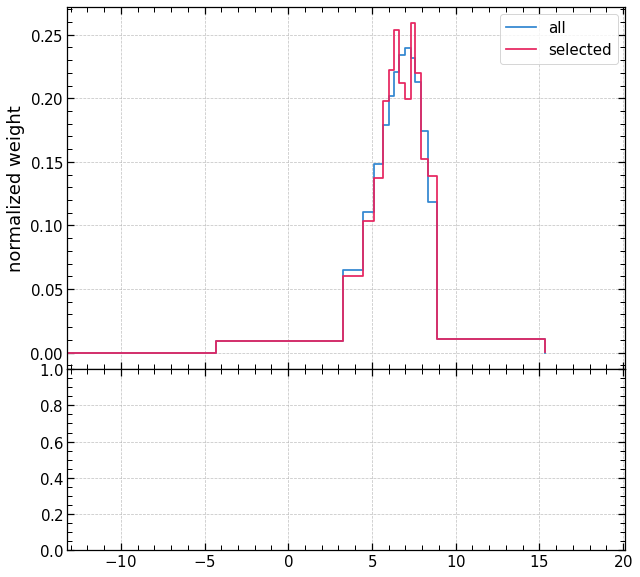

Incorporating bias "DESI:col_w3w4_orig" ...
magnitude histogram of column "DESI_col_w3w4_orig": 717 secure matches, 2988 insecure matches and 612038 secure non-matches of 2418574 total entries (612755 valid)
magnitude histogram stored to "DESI_col_w3w4_orig_fit.txt".


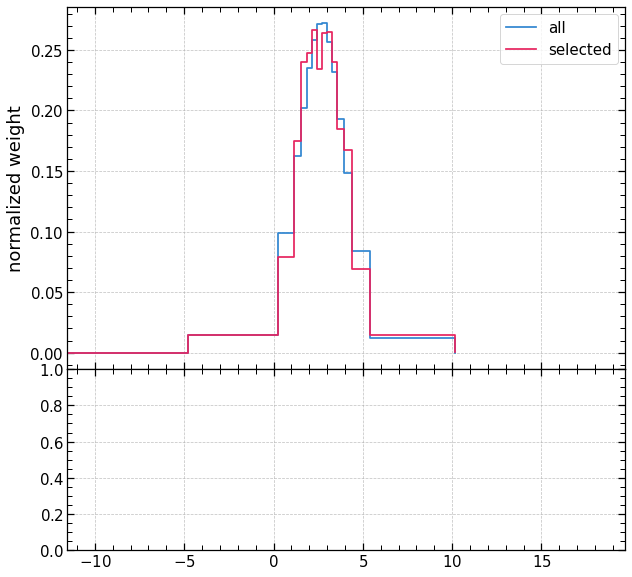


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [10]:

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
**nway_args
)

In [16]:
os.system('rm DESI*_fit.txt')

rm: DESI*_fit.txt: No such file or directory


256


For a false detection rate of <5%
--> use only counterparts with p_any>0.82 (72.53% of matches)
The efficiency is 79.05%
The purity is  79.51%


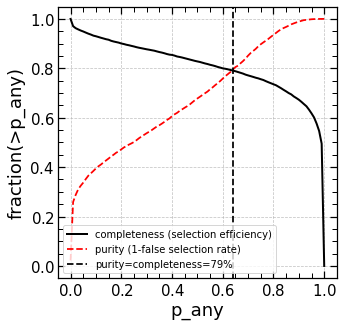

In [11]:
cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)

## Asses the performance of the NWAY with validation catalog (CSC & XMM)

In [12]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])

In [13]:
nway_res_ero


,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_mag_g_orig,bias_DESI_mag_r_orig,bias_DESI_mag_z_orig,bias_DESI_mag_w1_orig,bias_DESI_mag_w2_orig,bias_DESI_mag_w3_orig,bias_DESI_mag_w4_orig,bias_DESI_col_gr_orig,bias_DESI_col_rz_orig,bias_DESI_col_gz_orig,bias_DESI_col_zw1_orig,bias_DESI_col_rw2_orig,bias_DESI_col_w1w2_orig,bias_DESI_col_zw3_orig,bias_DESI_col_rw4_orig,bias_DESI_col_w3w4_orig,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,mag_g,mag_r,mag_z,mag_w1,mag_w2,mag_w3,mag_w4,col_gr,col_rz,col_gz,col_zw1,col_rw2,col_w1w2,col_zw3,col_rw4,col_w3w4,prior_type,nnmag_grzw1w2w3w4,nnmag_grzw1w2w3w4_orig,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grz,nnmag_grz_orig,mag_g_orig,mag_r_orig,mag_z_orig,mag_w1_orig,mag_w2_orig,mag_w3_orig,mag_w4_orig,col_gr_orig,col_rz_orig,col_gz_orig,col_zw1_orig,col_rw2_orig,col_w1w2_orig,col_zw3_orig,col_rw4_orig,col_w3w4_orig
0,0,10477,0.042512,0.042512,2,11.113504,11.113504,9.819219e-01,3.851571,3.222167,3.002970,5.285103,6.913931,11.234804,3.465220,0.974076,0.954286,1.777305,1.085180,1.427263,2.157942,0.957206,1.696284,1.526417,1.000000e+00,1,1.000000,1.000000e+00,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1184',159.434616,57.198786,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,b'grzw1w2w3w4',0.972917,0.972917,-99.000000,0.978616,-99.000000,0.926722,16.058165,16.111576,15.616705,14.459218,14.227020,14.269917,13.372561,-0.053411,0.494871,0.441460,1.157487,1.884556,0.232198,1.346788,2.739015,0.897356
28,0,2289777,9.399113,9.399113,2,-18.205065,-18.205065,2.608283e-28,0.599905,0.535245,0.525434,1.000000,1.000000,1.000000,1.000000,0.787819,0.824254,0.818563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.339094e-29,0,1.000000,5.935487e-37,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1223',159.439360,57.199177,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,b'grz',-99.000000,-99.000000,-99.000000,-99.000000,0.210298,0.210298,25.948793,24.556490,22.966312,NaN,NaN,NaN,NaN,1.392303,1.590178,2.982481,NaN,NaN,NaN,NaN,NaN,NaN
12,0,784834,9.507520,9.507520,2,-18.885286,-18.885286,5.446703e-29,0.741733,0.530130,0.525434,0.587263,0.540680,2.111934,1.021461,0.974076,1.105306,2.579948,1.501982,1.301028,1.270160,0.776822,0.561505,0.996609,2.310216e-29,0,1.000000,5.862209e-37,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1210',159.437965,57.200696,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,b'grzw1w2w3w4',0.335119,0.335119,-99.000000,0.572273,-99.000000,0.303332,23.338484,23.416210,23.045345,21.072514,21.045940,17.639517,15.477362,-0.077726,0.370865,0.293139,1.972831,2.370270,0.026574,5.405828,7.938848,2.162155
19,0,1418910,10.924277,10.924277,2,-28.492115,-28.492115,1.346804e-38,0.475125,0.535245,1.000000,0.299422,0.361380,1.000000,1.000000,0.974076,1.000000,1.000000,1.000000,1.325484,0.827608,1.000000,1.000000,1.000000,3.960076e-40,0,1.000000,1.004875e-47,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN,b'9011_609162_1191',159.435390,57.201792,0.685364,0.687664,-99.0,0.637958,0.613978,-99.000000,-99.000000,-0.008048,-99.0,-99.0,-99.000000,0.257898,0.083929,-99.000000,-99.000000,-99.0,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,23.987741,24.068224,NaN,22.328527,21.489239,NaN,NaN,-0.080483,NaN,NaN,NaN,2.578985,0.839288,NaN,NaN,NaN
17,0,1123492,13.104032,13.104032,2,-45.874472,-45.874472,5.584023e-56,0.530889,1.075338,1.725411,1.450069,0.540680,0.655766,1.000000,0.801690,0.

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 93% 
 Purity = 93% 
 prob_has_match optimal cutoff =  0.58 
 Fraction of sources with prob_has_match > 0.58 = 82%
+++Statistics+++
677 X-ray sources in validation set with counterparts
--Out of those, 49 sources were assigned hostless (prob_has_match < 0.58) 
628 sources have prob_has_match > 0.58
Out of those 628: 
--582 sources have correct nway counterpart
--46 sources have incorrect nway counterpart


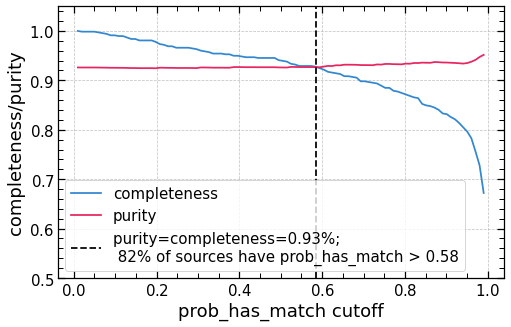

In [14]:
assess_goodnes_nway_cross_match(nway_res_ero);